In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import random

DATA_DIR = 'results_003_lang_id_classification_2_weight_decay_0.02/'
#DATA_DIR = 'results_003_lang_id_classification_2_weight_decay_0.05/'
#DATA_DIR = 'results_003_lang_id_classification_2_weight_decay_0.08/'



#COLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
random.seed(42)
COLORS = ["#7f7f7f", "#1f77b4"]


n = 84
n_train = int(np.ceil(n * .6))
n_test = n - n_train


In [2]:
data_frames = {}

variable_names = []

for model_path in Path(DATA_DIR).iterdir():
    if not model_path.is_dir():
        continue
        
    if "NN" not in str(model_path):
        continue
    
    model_name = model_path.stem
    print(f"MODEL: {model_name}")
    fold_names = []
    
    data_frames[model_name] = {}
    
    for p in Path(model_path).iterdir():
        if p.suffixes[-1] != '.csv':
            continue
        fold_name = p.stem
        fold_names.append(fold_name)
        data_frames[model_name][fold_name] = pd.read_csv(p)
        variable_names.extend(list(data_frames[model_path.stem][p.stem].columns))
    for fold_name in sorted(fold_names):
        print(f"\t{fold_name}")

print(f"VARIABLES")        
for variable_name in sorted(set(variable_names)):
    print(f"\t{variable_name}")
        
    

MODEL: LangIdCNN1
	retrained-wav2vec_features-c_0
	retrained-wav2vec_features-c_1
	retrained-wav2vec_features-c_2
	retrained-wav2vec_features-c_3
	retrained-wav2vec_features-c_4
	retrained-wav2vec_features-c_5
	retrained-wav2vec_features-c_6
	retrained-wav2vec_features-c_7
	retrained-wav2vec_features-c_8
	retrained-wav2vec_features-c_9
	retrained-wav2vec_features-z_0
	retrained-wav2vec_features-z_1
	retrained-wav2vec_features-z_2
	retrained-wav2vec_features-z_3
	retrained-wav2vec_features-z_4
	retrained-wav2vec_features-z_5
	retrained-wav2vec_features-z_6
	retrained-wav2vec_features-z_7
	retrained-wav2vec_features-z_8
	retrained-wav2vec_features-z_9
	wav2vec_features-c_0
	wav2vec_features-c_1
	wav2vec_features-c_2
	wav2vec_features-c_3
	wav2vec_features-c_4
	wav2vec_features-c_5
	wav2vec_features-c_6
	wav2vec_features-c_7
	wav2vec_features-c_8
	wav2vec_features-c_9
	wav2vec_features-z_0
	wav2vec_features-z_1
	wav2vec_features-z_2
	wav2vec_features-z_3
	wav2vec_features-z_4
	wav2vec_fea

In [3]:
def get_variable_stats(model_name, feature_prefix, variable, sample_size):
    selected_dfs = [v for k, v in data_frames[model_name].items() if k.startswith(feature_prefix)]
    
    epoch_count = selected_dfs[0].shape[0]
    experiment_count = len(selected_dfs)
    
    data = np.zeros((epoch_count, experiment_count))
    
    for index, df in enumerate(selected_dfs):
        data[:, index] = df[variable]
    
    m = np.mean(data, axis=1)
    minimum = np.max(data, axis=1)
    maximum = np.min(data, axis=1)
    
    sem = np.std(data, axis=1) / np.sqrt(sample_size)
    
    if variable == 'test_acc':
        print(f"{model_name}, {feature_prefix} {variable}, max: {np.max(m)}")
        # print(f"{model_name}, {feature_prefix} {variable}, max: {np.max(m_max)}, min {np.min(m_min)}")
    return data, m, sem, minimum, maximum
    
        

In [4]:
def plot_comparative_variables(ax, model_name, feature_prefixes, variable, sample_size):
    line_styles = ['-.', '-']
    for index, feature_prefix in enumerate(feature_prefixes):
        data, m, sem, minimum, maximum = get_variable_stats(model_name, feature_prefix, variable, sample_size)
        
        x = range(1, data.shape[0]+1)

        ax.plot(x, m, color=COLORS[index], linestyle=line_styles[index], label=f'{model_name} {feature_prefix}', alpha=1)
        ax.fill_between(x, m+sem, m-sem, color=COLORS[index], alpha=0.6)
        ax.fill_between(x, minimum, maximum, color=COLORS[index], alpha=0.1)

    ax.grid(True)
    ax.title.set_text(variable)
    ax.legend()

In [5]:
def plot_results(model_names, variables_and_sample_sizes, compared_features):
    variables = [t[0] for t in variables_and_sample_sizes]
    sample_sizes_by_variable = {t[0]:t[1] for t in variables_and_sample_sizes}

    plot_width = len(model_names)*7
    plot_height = len(variables)*7
    fig, axes = plt.subplots(len(variables), len(model_names), sharex=True, sharey='row', figsize=(plot_width, plot_height))
    for variable_index, variable in enumerate(variables):
        # fig, axes = plt.subplots(1, len(model_names), sharex=True, sharey=True, figsize=(20, 7))
        sample_size = sample_sizes_by_variable[variable]
        for model_index, model_name in enumerate(model_names):
            plot_comparative_variables(
                axes[variable_index, model_index],
                model_name,
                compared_features,
                variable,
                sample_size
            )

In [6]:
model_names = ['LangIdCNN1', 'LangIdRNN1']

variables_and_sample_sizes = [
    ('train_loss', n_train),
    ('test_loss', n_test),
    ('train_acc', n_train),
    ('test_acc', n_test),
    ('test_acc_gender_male', n_test),
    ('test_acc_gender_female', n_test),
    ('test_acc_language_maninka', n_test),
    ('test_acc_language_pular', n_test),
    ('test_acc_language_susu', n_test)
]

# Language classification with context features

LangIdCNN1, wav2vec_features-c test_acc, max: 0.44848484848484843
LangIdCNN1, retrained-wav2vec_features-c test_acc, max: 0.5484848484848486
LangIdRNN1, wav2vec_features-c test_acc, max: 0.4333333333333334
LangIdRNN1, retrained-wav2vec_features-c test_acc, max: 0.5151515151515152


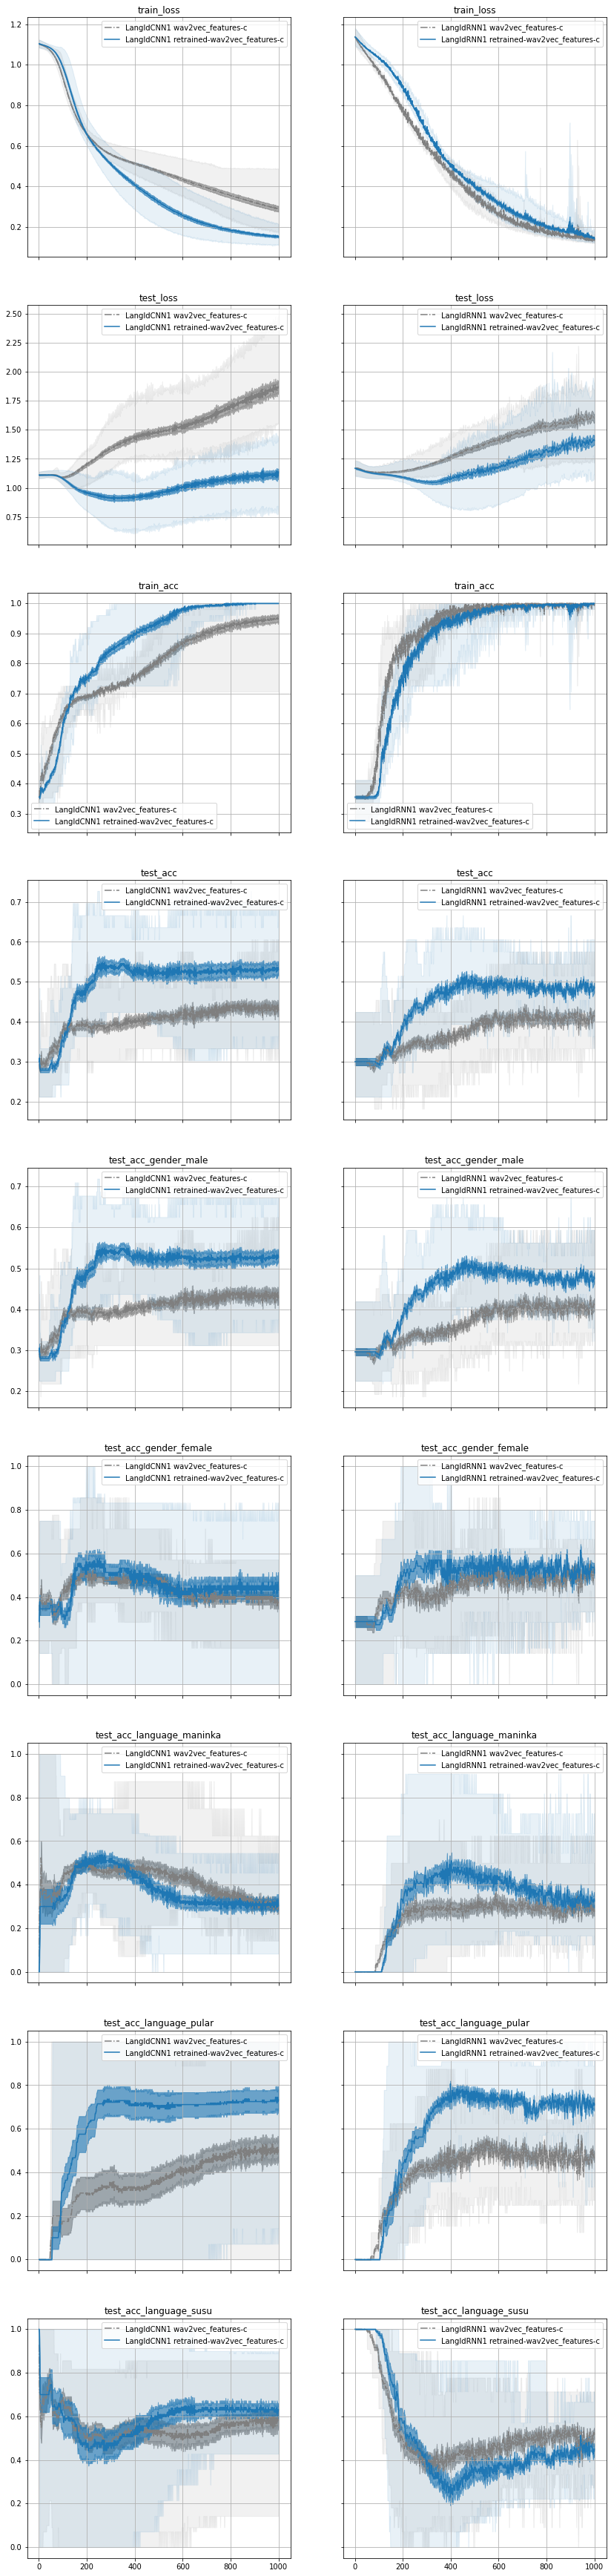

In [7]:
compared_features = ['wav2vec_features-c', 'retrained-wav2vec_features-c']
plot_results(model_names, variables_and_sample_sizes, compared_features)

# Language Classification With Latent Features

LangIdCNN1, wav2vec_features-z test_acc, max: 0.45151515151515154
LangIdCNN1, retrained-wav2vec_features-z test_acc, max: 0.5303030303030304
LangIdRNN1, wav2vec_features-z test_acc, max: 0.40606060606060607
LangIdRNN1, retrained-wav2vec_features-z test_acc, max: 0.46060606060606063


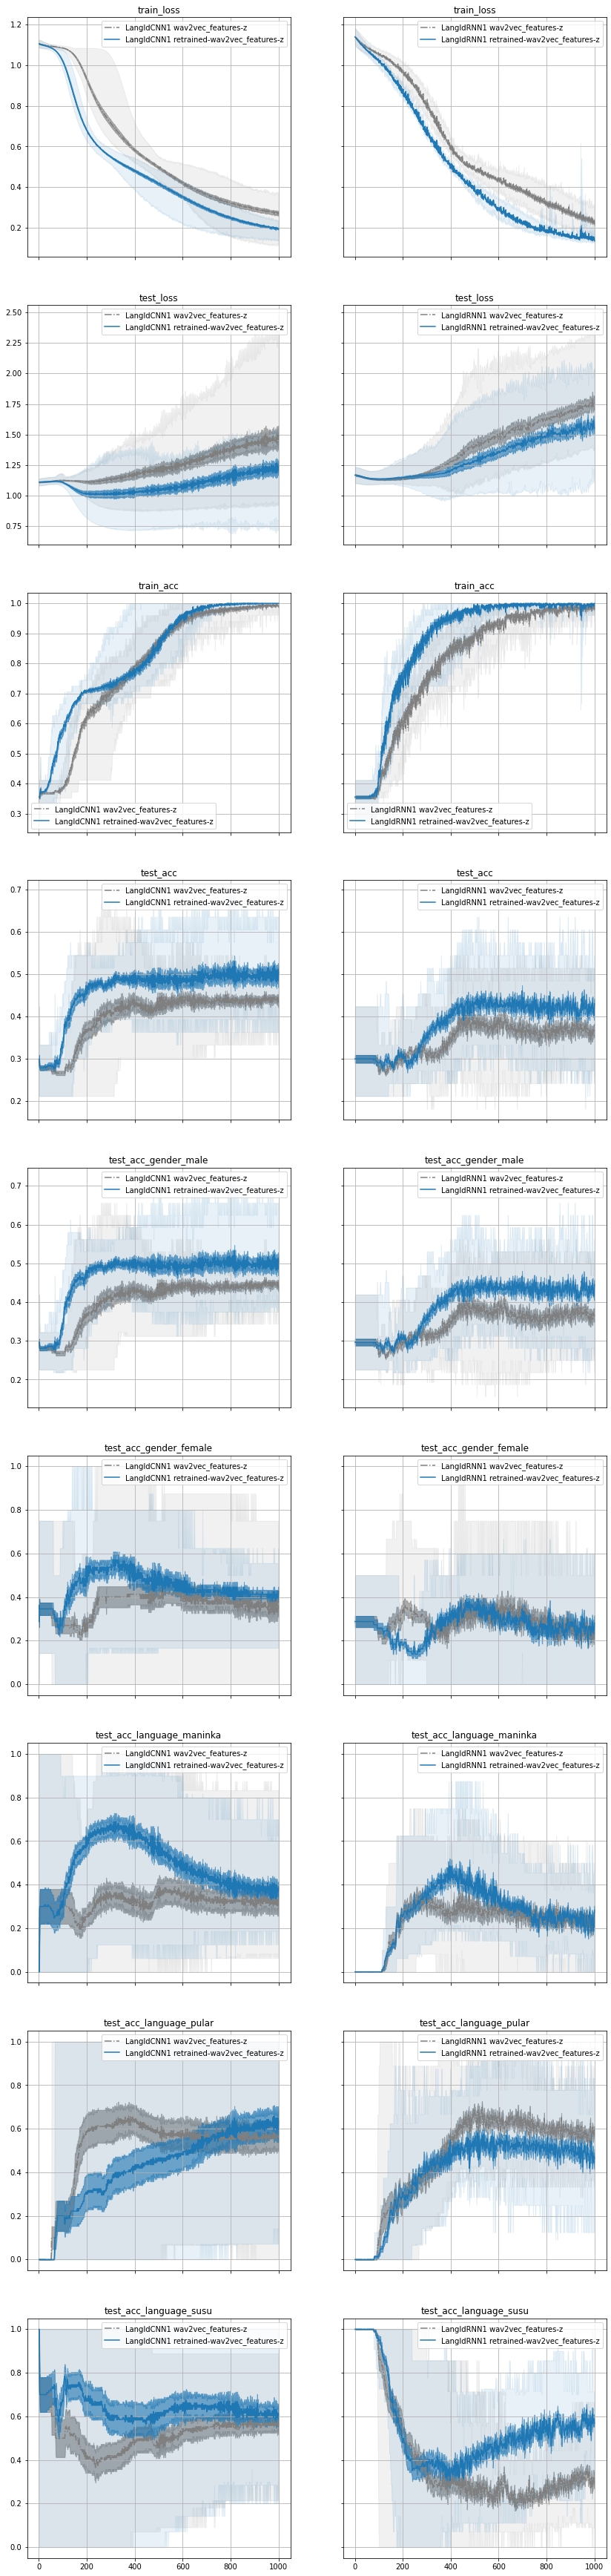

In [8]:
compared_features = ['wav2vec_features-z', 'retrained-wav2vec_features-z']
plot_results(model_names, variables_and_sample_sizes, compared_features)